# Energy consumption of training Stable Diffusion
Author: Mathilde Jay    
Date: 01/08/2023

### Summary
- Analysis of energy consumed
- Analysis of power timeseries
    - by components
    - in total
- Analysis of ML stats

The results were first processed using the script "process_results.py" : 
```
python utils/process_results.py --analysis_git_dir "/home/mjay/ai-energy-consumption-framework" --result_folder "/home/mjay/laion/pokemon/training_13_09_sirius"
```

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import seaborn as sns
import math

## Description of results

In [12]:
files = [
    "/home/mjay/laion/pokemon/training_6_09_sirius/",
    "/home/mjay/laion/pokemon/training_11_09_sirius/",
    "/home/mjay/laion/pokemon/training_13_09_sirius/",
    # "/home/mjay/laion/pokemon/training_27_09_sirius/",
]
exp_table = pd.DataFrame()
for f in files:
    table = pd.read_csv(f+"processed_table.csv")
    exp_table = pd.concat([exp_table, table])    
cols = [x for x in exp_table.columns if "tool" not in x and "id" not in x and "dir" not in x]
exp_table[cols].T

,0,1,2,3,4,5,6,7,8,9,...,10,11,0,1,2,3,4,5,6,7
experiment_start,1694021110.254673,1694021382.684166,1694021641.076188,1694021919.419427,1694022160.762756,1694022424.217813,1694022717.580336,1694022960.855645,1694023234.243062,1694023548.089977,...,1694466609.196512,1694468948.025358,1694625636.262681,1694628187.636724,1694631642.836078,1694636053.891289,1694643599.442096,1694654351.129999,1694668379.697234,1694670915.720232
experiment_end,1694021379.952203,1694021638.320573,1694021916.729024,1694022158.083153,1694022421.427514,1694022714.904134,1694022958.18706,1694023231.507602,1694023545.282456,1694023793.447829,...,1694468944.976992,1694471923.736954,1694628183.3256,1694631638.365082,1694636048.658032,1694643595.090788,1694654345.745601,1694668372.671182,1694670911.678811,1694674351.623191
period,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
results,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
execution_script_args.sleep_before,90,90,90,90,90,90,90,90,90,90,...,90,90,90,90,90,90,90,90,90,90
execution_script_args.sleep_after,90,90,90,90,90,90,90,90,90,90,...,90,90,90,90,90,90,90,90,90,90
execution_script_args.benchmark_execution,accelerate launch /home/mjay/ai-energy-consump...,accelerate launch /home/mjay/ai-energy-consump...,accelerate launch /home/mjay/ai-energy-consump...,accelerate launch /home/mjay/ai-energy-consump...,accelerate launch /home/mjay/ai-energy-consump...,accelerate launch /home/mjay/ai-energy-consump...,accelerate launch /home/mjay/ai-energy-consump...,accelerate launch /home/mjay/ai-energy-consump...,accelerate launch /home/mjay/ai-energy-consump...,accelerate launch /home/mjay/ai-energy-consump...,...,accelerate launch /home/mjay/ai-energy-consump...,accelerate launch /home/mjay/ai-energy-consump...,accelerate launch /home/mjay/ai-energy-consump...,accelerate launch /home/mjay/ai-energy-consump...,accelerate launch /home/mjay/ai-energy-consump...,accelerate launch /home/mjay/ai-energy-consump...,accelerate launch /home/mjay/ai-energy-consump...,accelerate launch /home/mjay/ai-energy-consump...,accelerate launch /home/mjay/ai-energy-consump...,accelerate launch /home/mjay/ai-energy-consump...
execution_script_template,/home/mjay/ai-energy-consumption-framework//ut...,/home/mjay/ai-energy-consumption-framework//ut...,/home/mjay/ai-energy-consumption-framework//ut...,/home/mjay/ai-energy-consumption-framework//ut...,/home/mjay/ai-energy-consumption-framework//ut...,/home/mjay/ai-energy-consumption-framework//ut...,/home/mjay/ai-energy-consumption-framework//ut...,/home/mjay/ai-energy-consumption-framework//ut...,/home/mjay/ai-energy-consumption-framework//ut...,/home/mjay/ai-energy-consumption-framework//ut...,...,/home/mjay/ai-energy-consumption-framework//ut...,/home/mjay/ai-energy-consumption-framework//ut...,/home/mjay/ai-energy-consumption-framework//ut...,/home/mjay/ai-energy-consumption-framework//ut...,/home/mjay/ai-energy-consumption-framework//ut...,/home/mjay/ai-energy-consumption-framework//ut...,/home/mjay/ai-energy-consumption-framework//ut...,/home/mjay/ai-energy-consumption-framework//ut...,/home/mjay/ai-energy-consumption-framework//ut...,/home/mjay/ai-energy-consumption-framework//ut...
execution_script_path,/home/mjay/laion/pokemon/training_6_09_sirius/...,/home/mjay/laion/pokemon/training_6_09_sirius/...,/home/mjay/laion/pokemon/training_6_09_sirius/...,/home/mjay/laion/pokemon/training_6_09_sirius/...,/home/mjay/laion/pokemon/training_6_09_sirius/...,/home/mjay/laion/pokemon/training_6_09_sirius/...,/home/mjay/laion/pokemon/training_6_09_sirius/...,/home/mjay/laion/pokemon/training_6_09_sirius/...,/home/mjay/laion/pokemon/training_6_09_sirius/...,/home/mjay/laion/pokemon/training_6_09_sirius/...,...,/home/mjay/laion/pokemon/training_11_09_sirius...,/home/mjay/laion/pokemon/training_11_09_sirius...,/home/mjay/laion/pokemon/training_13_09_sirius...,/home/mjay/laion/pokemon/training_13_09_sirius...,/home/mjay/lai

In [13]:
def compute_steps(row):
    update_per_epoch = math.ceil(row["max_train_samples"]/(row["gradient_accumulation_steps"]*row["train_batch_size"]*row["gpu_count"]))
    return row["num_train_epochs"]*update_per_epoch

exp_table["num_steps"] = exp_table.apply(compute_steps, axis=1)

## Bench duration

In [14]:
exp_table["bench_duration(sec)"]=exp_table["bench_end(sec)"]-exp_table["bench_start(sec)"]

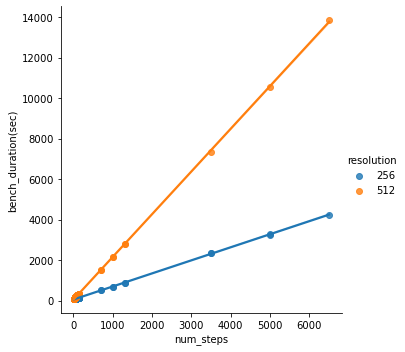

In [15]:
sns.lmplot(data=exp_table, x="num_steps", y="bench_duration(sec)", hue="resolution")


In [17]:

img_size = 256

table = exp_table[(exp_table["resolution"]==img_size)].groupby([
        'num_steps'])[["bench_duration(sec)"]]

X = np.array([np.array(x) for x in table.mean().index]).reshape(-1, 1)
y = table.mean().values

reg = LinearRegression().fit(X, y)

print(reg.coef_[0][0])
print(reg.intercept_[0])


0.6445411954257902
51.164691679871
